In [1]:
import lattice
from hamiltonian import FermiHubbard
import retworkx
import numpy as np

/Users/kensuketamura/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# **General Lattice**

In [2]:
graph = retworkx.PyGraph(multigraph=False)
graph.add_nodes_from(range(6))
weighted_edge_list = [(0, 1, 1.0), (0, 2, -1.0), (2, 3, 2.0), (4, 2, -1.0), (4, 4, 3.0), (2, 5, -1.0)]
graph.add_edges_from(weighted_edge_list)
graph.add_edge(0, 1, -1.0)
list(graph.weighted_edge_list())
general_lattice = lattice.Lattice(graph)

## visualization

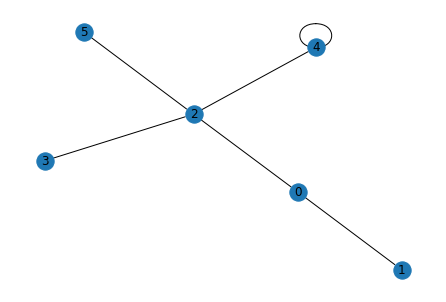

In [3]:
general_lattice.draw(with_labels=True)

## **adjacency matrix(hopping matrix) $t_{x, y}$**

In [4]:
general_lattice.to_adjacency_matrix()

array([[ 0.+0.j, -1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  2.+0.j, -1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

## **Fermi-Hubbard model**

In [5]:
onsite_interaction = 2.0
FHM = FermiHubbard(
    lattice=general_lattice,
    onsite_interaction=onsite_interaction
)

ham = FHM.hamiltonian()
ham.set_label_display_mode("sparse")
print(ham)

  +_0 -_2 * (-1+0j)
+ -_0 +_2 * (1+0j)
+ +_0 -_4 * (-1+0j)
+ -_0 +_4 * (1+0j)
+ +_4 -_6 * (2+0j)
+ -_4 +_6 * (-2+0j)
+ +_4 -_8 * (-1+0j)
+ -_4 +_8 * (1+0j)
+ +_8 -_8 * (3+0j)
+ +_4 -_10 * (-1+0j)
+ -_4 +_10 * (1+0j)
+ +_1 -_3 * (-1+0j)
+ -_1 +_3 * (1+0j)
+ +_1 -_5 * (-1+0j)
+ -_1 +_5 * (1+0j)
+ +_5 -_7 * (2+0j)
+ -_5 +_7 * (-2+0j)
+ +_5 -_9 * (-1+0j)
+ -_5 +_9 * (1+0j)
+ +_9 -_9 * (3+0j)
+ +_5 -_11 * (-1+0j)
+ -_5 +_11 * (1+0j)
+ +_0 -_0 +_1 -_1 * (2+0j)
+ +_2 -_2 +_3 -_3 * (2+0j)
+ +_4 -_4 +_5 -_5 * (2+0j)
+ +_6 -_6 +_7 -_7 * (2+0j)
+ +_8 -_8 +_9 -_9 * (2+0j)
+ +_10 -_10 +_11 -_11 * (2+0j)


In [6]:
FHM.hopping_matrix()

array([[ 0.+0.j, -1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  2.+0.j, -1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

In [6]:
FHM.hopping_matrix()

array([[ 0.+0.j,  1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  2.+0.j, -1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  3.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

# **One-dimensional case(open boundary condition)**

In [7]:
lattice_points = 4
t = -1.0
onsite_potential = 1.0
one_dim_lattice = lattice.LineLattice(
    num_nodes=lattice_points,
    edge_parameter=t,
    onsite_parameter=onsite_potential,
    boundary_condition="open"
)

## **visualization**

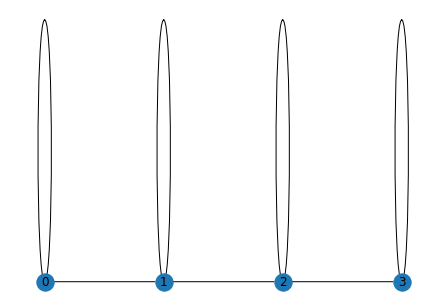

In [8]:
pos = {0:[0, 0], 1:[1, 0], 2:[2, 0], 3:[3, 0]}
one_dim_lattice.draw(pos=pos, with_labels=True)

## **Fermi-Hubbard model**

In [9]:
onsite_interaction = 5.0
FHM = FermiHubbard(
    one_dim_lattice,
    onsite_interaction
)
FHM.hamiltonian()

FermionicOp([('+_0 -_2', (-1+0j)), ('-_0 +_2', (1+0j)), ('+_2 -_4', (-1+0j)), ('-_2 +_4', (1+0j)), ('+_4 -_6', (-1+0j)), ('-_4 +_6', (1+0j)), ('+_0 -_0', (1+0j)), ('+_2 -_2', (1+0j)), ('+_4 -_4', (1+0j)), ('+_6 -_6', (1+0j)), ('+_1 -_3', (-1+0j)), ('-_1 +_3', (1+0j)), ('+_3 -_5', (-1+0j)), ('-_3 +_5', (1+0j)), ('+_5 -_7', (-1+0j)), ('-_5 +_7', (1+0j)), ('+_1 -_1', (1+0j)), ('+_3 -_3', (1+0j)), ('+_5 -_5', (1+0j)), ('+_7 -_7', (1+0j)), ('+_0 -_0 +_1 -_1', (5+0j)), ('+_2 -_2 +_3 -_3', (5+0j)), ('+_4 -_4 +_5 -_5', (5+0j)), ('+_6 -_6 +_7 -_7', (5+0j))], register_length=8)

In [10]:
FHM.hopping_matrix()

array([[ 1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  1.+0.j]])

## **Operator expression**

$$
\begin{align*}
H &= \sum_{i = 0}^{2} \sum_{\sigma = \uparrow, \downarrow} (t c_{i, \sigma}^\dagger c_{i+1, \sigma} + t c_{i+1, \sigma}^\dagger c_{i, \sigma})+ U \sum_{i=0}^{3} n_{i, \uparrow} n_{i, \downarrow} \\
&= t c_{0, \uparrow}^\dagger c_{1, \uparrow} - t c_{0, \uparrow} c_{1, \uparrow}^{\dagger} \\
& \ + t c_{1, \uparrow}^\dagger c_{2, \uparrow} - t c_{1, \uparrow} c_{2, \uparrow}^{\dagger} \\
& \ + t c_{2, \uparrow}^\dagger c_{3, \uparrow} - t c_{2, \uparrow} c_{3, \uparrow}^{\dagger} \\
& \ + v n_{0, \uparrow} + v n_{1, \uparrow} + v n_{2, \uparrow} + v n_{3, \uparrow} \\
& \ + t c_{0, \downarrow}^\dagger c_{1, \downarrow} - t c_{0, \downarrow} c_{1, \downarrow}^{\dagger} \\
& \ + t c_{1, \downarrow}^\dagger c_{2, \downarrow} - t c_{1, \downarrow} c_{2, \downarrow}^{\dagger} \\
& \ + t c_{2, \downarrow}^\dagger c_{3, \downarrow} - t c_{2, \downarrow} c_{3, \downarrow}^{\dagger} \\
& \ + v n_{0, \downarrow} + v n_{1, \downarrow} + v n_{2, \downarrow} + v n_{3, \downarrow} \\
& \ + U n_{0, \uparrow} n_{0, \downarrow} + U n_{1, \uparrow} n_{1, \downarrow} + + U n_{2, \uparrow} n_{2, \downarrow} + U n_{3, \uparrow} n_{3, \downarrow}
\end{align*}
$$

# **One-dimensional case (periodic boundary condition)**

In [11]:
lattice_points = 4
t = -1.0
onsite_potential = 1.0
one_dim_lattice = lattice.LineLattice(
    num_nodes=lattice_points,
    edge_parameter=t,
    onsite_parameter=onsite_potential,
    boundary_condition="periodic"
)

## **visualization**

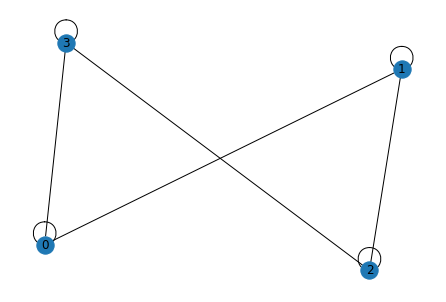

In [12]:
one_dim_lattice.draw(with_labels=True)

## **Fermi-Hubbard model**

In [13]:
FHM = FermiHubbard(
    one_dim_lattice,
    onsite_interaction
)

FHM.hamiltonian()

FermionicOp([('+_0 -_2', (-1+0j)), ('-_0 +_2', (1+0j)), ('+_2 -_4', (-1+0j)), ('-_2 +_4', (1+0j)), ('+_4 -_6', (-1+0j)), ('-_4 +_6', (1+0j)), ('+_0 -_6', (-1+0j)), ('-_0 +_6', (1+0j)), ('+_0 -_0', (1+0j)), ('+_2 -_2', (1+0j)), ('+_4 -_4', (1+0j)), ('+_6 -_6', (1+0j)), ('+_1 -_3', (-1+0j)), ('-_1 +_3', (1+0j)), ('+_3 -_5', (-1+0j)), ('-_3 +_5', (1+0j)), ('+_5 -_7', (-1+0j)), ('-_5 +_7', (1+0j)), ('+_1 -_7', (-1+0j)), ('-_1 +_7', (1+0j)), ('+_1 -_1', (1+0j)), ('+_3 -_3', (1+0j)), ('+_5 -_5', (1+0j)), ('+_7 -_7', (1+0j)), ('+_0 -_0 +_1 -_1', (5+0j)), ('+_2 -_2 +_3 -_3', (5+0j)), ('+_4 -_4 +_5 -_5', (5+0j)), ('+_6 -_6 +_7 -_7', (5+0j))], register_length=8)

In [14]:
FHM.hopping_matrix()

array([[ 1.+0.j, -1.+0.j,  0.+0.j, -1.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [-1.+0.j,  0.+0.j, -1.+0.j,  1.+0.j]])

# **Square lattice**

In [15]:
rows = 5
cols = 3
square = lattice.SquareLattice(
    rows=rows,
    cols=cols,
    edge_parameter=(1.0, -1.0),
    boundary_condition="open"
)

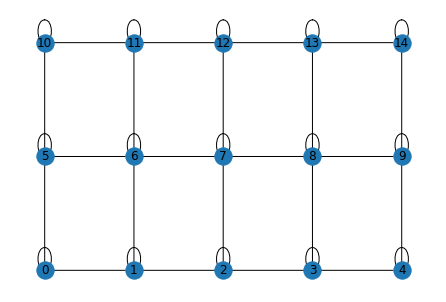

In [16]:
def indextocoord(index:int, size:list) -> list:
    x = index % rows
    y = index // rows
    return [x, y]
pos = dict([(index, indextocoord(index, [rows, cols])) for index in range(np.prod([rows, cols]))])
square.draw(pos=pos, with_labels=True)

In [17]:
onsite_interaction = 2.0
FHM = FermiHubbard(
    lattice=square,
    onsite_interaction=onsite_interaction
)
FHM.hamiltonian()

FermionicOp([('+_0 -_2', (1+0j)), ('-_0 +_2', (-1+0j)), ('+_0 -_10', (-1+0j)), ('-_0 +_10', (1+0j)), ('+_0 -_0', 0j), ('+_10 -_12', (1+0j)), ('-_10 +_12', (-1+0j)), ('+_10 -_20', (-1+0j)), ('-_10 +_20', (1+0j)), ('+_10 -_10', 0j), ('+_2 -_4', (1+0j)), ('-_2 +_4', (-1+0j)), ('+_2 -_12', (-1+0j)), ('-_2 +_12', (1+0j)), ('+_2 -_2', 0j), ('+_12 -_14', (1+0j)), ('-_12 +_14', (-1+0j)), ('+_12 -_22', (-1+0j)), ('-_12 +_22', (1+0j)), ('+_12 -_12', 0j), ('+_4 -_6', (1+0j)), ('-_4 +_6', (-1+0j)), ('+_4 -_14', (-1+0j)), ('-_4 +_14', (1+0j)), ('+_4 -_4', 0j), ('+_14 -_16', (1+0j)), ('-_14 +_16', (-1+0j)), ('+_14 -_24', (-1+0j)), ('-_14 +_24', (1+0j)), ('+_14 -_14', 0j), ('+_6 -_8', (1+0j)), ('-_6 +_8', (-1+0j)), ('+_6 -_16', (-1+0j)), ('-_6 +_16', (1+0j)), ('+_6 -_6', 0j), ('+_16 -_18', (1+0j)), ('-_16 +_18', (-1+0j)), ('+_16 -_26', (-1+0j)), ('-_16 +_26', (1+0j)), ('+_16 -_16', 0j), ('+_20 -_22', (1+0j)), ('-_20 +_22', (-1+0j)), ('+_20 -_20', 0j), ('+_22 -_24', (1+0j)), ('-_22 +_24', (-1+0j)), ('

In [18]:
FHM.hopping_matrix()

array([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
         0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0

# **The FHM from parameters(hopping matrix and on-site interaction)**

In [19]:
hopping_matrix = np.array([
    [1. , -1. + 1.j, -5.+5.j], 
    [-1.-1.j, 2., 1.], 
    [-5.-5.j, 1., 2.]
])

onsite_interaction = 2.0

FHM = FermiHubbard.from_parameters(
    hopping_matrix=hopping_matrix,
    onsite_interaction=onsite_interaction
)

ham = FHM.hamiltonian()
print(ham)

  +_0 -_0 * (1+0j)
+ +_0 -_2 * (-1+1j)
+ -_0 +_2 * (1+1j)
+ +_0 -_4 * (-5+5j)
+ -_0 +_4 * (5+5j)
+ +_2 -_2 * (2+0j)
+ +_2 -_4 * (1+0j)
+ -_2 +_4 * (-1+0j)
+ +_4 -_4 * (2+0j)
+ +_1 -_1 * (1+0j)
+ +_1 -_3 * (-1+1j)
+ -_1 +_3 * (1+1j)
+ +_1 -_5 * (-5+5j)
+ -_1 +_5 * (5+5j)
+ +_3 -_3 * (2+0j)
+ +_3 -_5 * (1+0j)
+ -_3 +_5 * (-1+0j)
+ +_5 -_5 * (2+0j)
+ +_0 -_0 +_1 -_1 * (2+0j)
+ +_2 -_2 +_3 -_3 * (2+0j)
+ +_4 -_4 +_5 -_5 * (2+0j)


In [20]:
FHM.hopping_matrix()

array([[ 1.+0.j, -1.+1.j, -5.+5.j],
       [-1.-1.j,  2.+0.j,  1.+0.j],
       [-5.-5.j,  1.+0.j,  2.+0.j]])

In [18]:
lattice_points = 4
t = -1.0
onsite_potential = 1.0
one_dim_lattice = lattice.LineLattice(
    num_nodes=lattice_points,
    hopping_parameter=t,
    onsite_potential=onsite_potential,
    boundary_condition="periodic"
)

## **visualization**

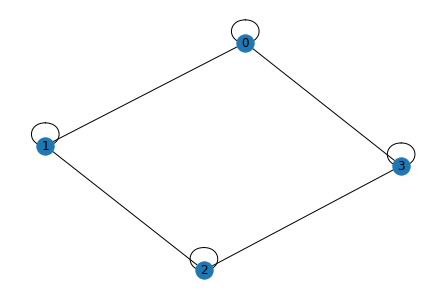

In [11]:
one_dim_lattice.draw(with_labels=True)

## **Fermi-Hubbard model**

In [12]:
FHM = FermiHubbard(
    one_dim_lattice,
    onsite_interaction
)

FHM.hamiltonian()

FermionicOp([('+I-IIIII', (-1+0j)), ('-I+IIIII', (1+0j)), ('II+I-III', (-1+0j)), ('II-I+III', (1+0j)), ('IIII+I-I', (-1+0j)), ('IIII-I+I', (1+0j)), ('+IIIII-I', (-1+0j)), ('-IIIII+I', (1+0j)), ('NIIIIIII', (1+0j)), ('IINIIIII', (1+0j)), ('IIIINIII', (1+0j)), ('IIIIIINI', (1+0j)), ('I+I-IIII', (-1+0j)), ('I-I+IIII', (1+0j)), ('III+I-II', (-1+0j)), ('III-I+II', (1+0j)), ('IIIII+I-', (-1+0j)), ('IIIII-I+', (1+0j)), ('I+IIIII-', (-1+0j)), ('I-IIIII+', (1+0j)), ('INIIIIII', (1+0j)), ('IIINIIII', (1+0j)), ('IIIIINII', (1+0j)), ('IIIIIIIN', (1+0j)), ('NNIIIIII', (5+0j)), ('IINNIIII', (5+0j)), ('IIIINNII', (5+0j)), ('IIIIIINN', (5+0j))])

In [13]:
FHM.hopping_matrix()

array([[ 1.+0.j, -1.+0.j,  0.+0.j, -1.+0.j],
       [-1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [-1.+0.j,  0.+0.j, -1.+0.j,  1.+0.j]])

# **Square lattice**

In [14]:
size = [5, 4]
square = lattice.SquareLattice(
    size=size,
    hopping_parameter=[1.0, -1.0],
    onsite_potential=-2.0,
    boundary_condition=["periodic", "periodic"]
)

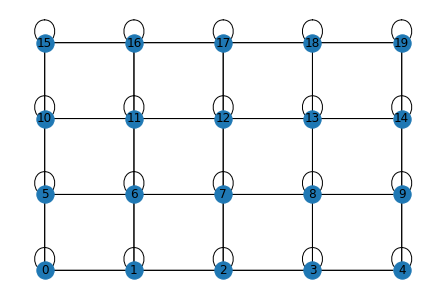

In [15]:
def indextocoord(index:int, size:list) -> list:
    y = index // size[0]
    x = index % size[0]
    return [x, y]
pos = dict([(index, indextocoord(index, size)) for index in range(np.prod(size))])
square.draw(pos=pos, with_labels=True)

In [16]:
onsite_interaction = 2.0
FHM = FermiHubbard(
    lattice=square,
    onsite_interaction=onsite_interaction
)
FHM.hamiltonian()

FermionicOp([('+I-IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', (1+0j)), ('-I+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', (-1+0j)), ('+IIIIIIIII-IIIIIIIIIIIIIIIIIIIIIIIIIIIII', (-1+0j)), ('-IIIIIIIII+IIIIIIIIIIIIIIIIIIIIIIIIIIIII', (1+0j)), ('NIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', (-2+0j)), ('IIIIIIIIII+I-IIIIIIIIIIIIIIIIIIIIIIIIIII', (1+0j)), ('IIIIIIIIII-I+IIIIIIIIIIIIIIIIIIIIIIIIIII', (-1+0j)), ('IIIIIIIIII+IIIIIIIII-IIIIIIIIIIIIIIIIIII', (-1+0j)), ('IIIIIIIIII-IIIIIIIII+IIIIIIIIIIIIIIIIIII', (1+0j)), ('IIIIIIIIIINIIIIIIIIIIIIIIIIIIIIIIIIIIIII', (-2+0j)), ('IIIIIIIIIIIIIIIIIIII+I-IIIIIIIIIIIIIIIII', (1+0j)), ('IIIIIIIIIIIIIIIIIIII-I+IIIIIIIIIIIIIIIII', (-1+0j)), ('IIIIIIIIIIIIIIIIIIII+IIIIIIIII-IIIIIIIII', (-1+0j)), ('IIIIIIIIIIIIIIIIIIII-IIIIIIIII+IIIIIIIII', (1+0j)), ('IIIIIIIIIIIIIIIIIIIINIIIIIIIIIIIIIIIIIII', (-2+0j)), ('IIIIIIIIIIIIIIIIIIIIIIIIIIIIII+I-IIIIIII', (1+0j)), ('IIIIIIIIIIIIIIIIIIIIIIIIIIIIII-I+IIIIIII', (-1+0j)), ('+IIIIIIIIIIIIIIIIIIIIIIIIIIIII-IIIIIIIII', (-1+0j)), ('-I

# **The FHM from parameters(hopping matrix and on-site interaction)**

In [20]:
hopping_matrix = np.array([
    [1. , -1. + 1.j, -5.+5.j], 
    [-1.-1.j, 2., 1.], 
    [-5.-5.j, 1., 2.]
])

onsite_interaction = 2.0

FHM = FermiHubbard.from_parameters(
    hopping_matrix=hopping_matrix,
    onsite_interaction=onsite_interaction
)

FHM.hamiltonian()

FermionicOp([('NIIIII', (1+0j)), ('+I-III', (-1+1j)), ('-I+III', (1+1j)), ('+III-I', (-5+5j)), ('-III+I', (5+5j)), ('IINIII', (2+0j)), ('II+I-I', (1+0j)), ('II-I+I', (-1+0j)), ('IIIINI', (2+0j)), ('INIIII', (1+0j)), ('I+I-II', (-1+1j)), ('I-I+II', (1+1j)), ('I+III-', (-5+5j)), ('I-III+', (5+5j)), ('IIINII', (2+0j)), ('III+I-', (1+0j)), ('III-I+', (-1+0j)), ('IIIIIN', (2+0j)), ('NNIIII', (2+0j)), ('IINNII', (2+0j)), ('IIIINN', (2+0j))])

In [18]:
FHM.hopping_matrix()

array([[ 1.+0.j, -1.+1.j, -5.+5.j],
       [-1.-1.j,  2.+0.j,  1.+0.j],
       [-5.-5.j,  1.+0.j,  2.+0.j]])